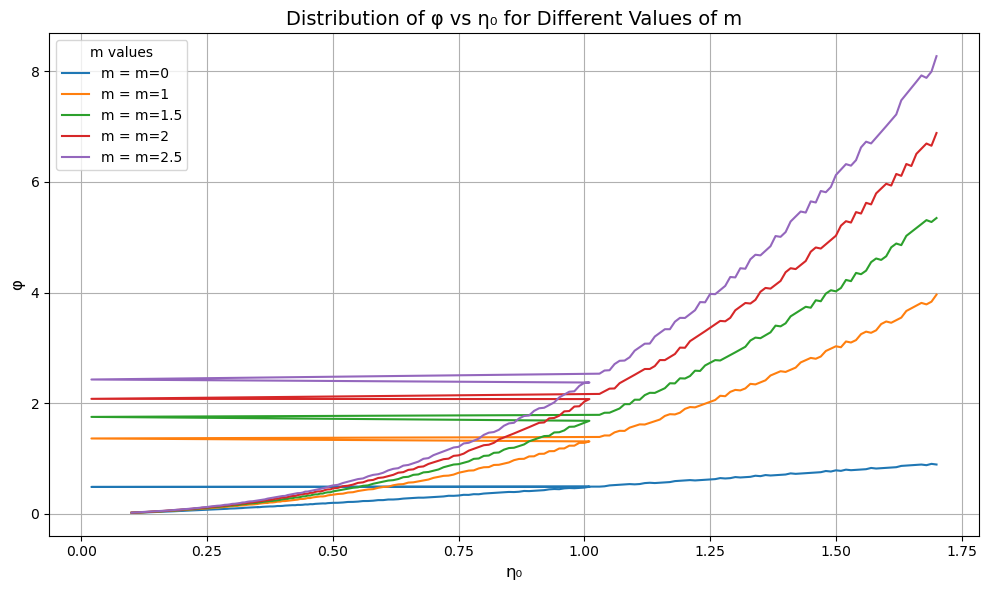

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('φ_vs_η0.csv')

plt.figure(figsize=(10, 6))

for col in df.columns[1:]:
    plt.plot(df['η₀'], df[col], label=f'm = {col}')

plt.xlabel('η₀', fontsize=12)
plt.ylabel('φ', fontsize=12)
plt.title('Distribution of φ vs η₀ for Different Values of m', fontsize=14)
plt.legend(title='m values')
plt.grid(True)
plt.tight_layout()
plt.show()


Test RMSE: 0.258


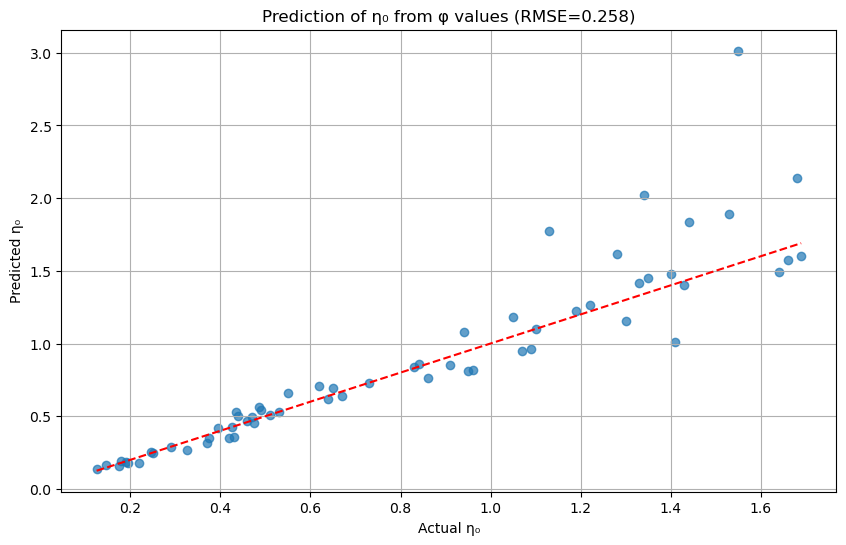

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv('φ_vs_η0.csv')

# Features X = all φ columns (all columns except η₀)
X = df[df.columns[1:]].values  # all φ columns as features

# Target y = η₀
y = df[['η₀']].values.flatten()  # η₀ as target vector

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Polynomial transformation (degree can be adjusted)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on test data
y_pred_test = model.predict(X_test_poly)

# RMSE
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"Test RMSE: {rmse:.3f}")

# Plot predicted vs actual η₀
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # diagonal line
plt.xlabel("Actual η₀")
plt.ylabel("Predicted η₀")
plt.title(f"Prediction of η₀ from φ values (RMSE={rmse:.3f})")
plt.grid(True)
plt.show()


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("φ_vs_η0.csv")  

df_melted = df.melt(id_vars='η₀', var_name='m', value_name='phi')

df_melted['m'] = df_melted['m'].str.extract(r"m=([\d\.]+)").astype(float)
df_melted = df_melted.rename(columns={'η₀': 'eta'})

X = df_melted[['phi', 'm']]
y = df_melted['eta']



In [31]:
df_melted.head()


,eta,m,phi
0,0.100,0.0,0.018889
1,0.105,0.0,0.020786
2,0.110,0.0,0.021899
3,0.115,0.0,0.023453
4,0.120,0.0,0.025543


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Predict 
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.006365167982673276
R² Score: 0.9687674631848393


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.007961138613861387
R² Score: 0.9609363719033233


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict 
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.0050
R² Score: 0.9756


In [51]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

y_pred = model.predict(X_test_scaled).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Mean Squared Error: 0.0055
R² Score: 0.9728


In [57]:
# found 5 exceptions in data
top5_min_eta = df_melted.nsmallest(5, 'eta')

print(top5_min_eta)


      eta    m       phi
133  0.02  0.0  0.487585
335  0.02  1.0  1.363470
537  0.02  1.5  1.753219
739  0.02  2.0  2.079505
941  0.02  2.5  2.428797


In [59]:
from tensorflow.keras.layers import Input

exceptions_dict = {
    (0.487585, 0.0): 0.02,
    (1.363470, 1.0): 0.02,
    (1.753219, 1.5): 0.02,
    (2.079505, 2.0): 0.02,
    (2.428797, 2.5): 0.02,
}

def predict_eta_batch(X_input, model, scaler=None):
    eta_preds = []
    for phi_val, m_val in X_input:
        key = (phi_val, m_val)
        if key in exceptions_dict:
            eta_preds.append(exceptions_dict[key])
        else:
            x_to_predict = np.array([[phi_val, m_val]])
            if scaler is not None:
                x_to_predict = scaler.transform(x_to_predict)
            pred = model.predict(x_to_predict, verbose=0)[0][0]
            eta_preds.append(pred)
    return np.array(eta_preds)

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Predict with exception check
y_pred = predict_eta_batch(X_test, model, scaler)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


ValueError: too many values to unpack (expected 2)